<a href="https://colab.research.google.com/github/Masumiub/Algorithm/blob/main/1920582_Md_Masum_Musfique_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Find the following integral using the simpson's 1/3 rule**

Simpson's 1/3 rule uses higher-order polynomials to approximate the integral of a function $f(x)$ over the interval $[a,b]$. For Example, if there is an extra point midway between $f(a)$ and $f(b)$, the three points can be connected with a parabola. The area under the parabola is an approximation of the integral of $f(x)$ over the interval $[a,b]$.

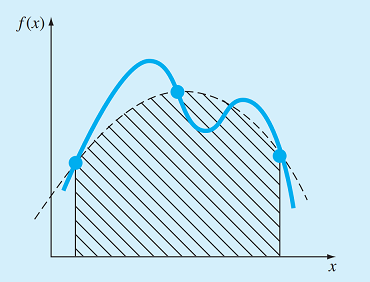

If we are given values of $f(x)$ at 3 points as $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ then we can estimate $f(x)$ using the Lagrange polynomial of degree 2: 

$$
\begin{align*}
f(x) &\approx f(x_0) \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} 
\end{align*}
$$

Now, as the area under the estimated curve is an approximation of the integral of $f(x)$ over the interval $[a,b]$, we can write the integral as:

$$
\begin{align*}
I &= \int_{a}^{b} f(x) dx \\
&\approx \int_{a}^{b} \left[f(x_0)\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \right] dx 
\end{align*}
$$

When $a = x_0$, $b = x_2$, $x_1 = \frac{a+b}{2}$, and $h = \frac{b-a}{2}$, we can simplify the integral to:

$$
\begin{align*}
    I &\approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right] \\
    &= (b-a) \frac{f(x_0) + 4f(x_1) + f(x_2)}{6}
\end{align*}
$$

We will use Simpson's 1/3 rule to approximate the integral of $f(x) = 0.2 + 25x - P^3 x^2 + Q^3 x^3 - 100Rx^4 + 400x^5$, where, PQR are last 3 digits of your roll number, over the interval $[0, 0.8]$. Follow the steps below to approximate the integral using Simpson's 1/3 rule.

##### **Step 1: Define the function**

Define a function `f` that takes a single parameter `x` and returns the value of $f(x) = 0.2 + 25x - P^3 x^2 + Q^3 x^3 - 100Rx^4 + 400x^5$ at `x`. Note that the function should be able to handle both scalar and vector inputs.


In [35]:
# Write appropriate code
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  P = 5
  Q = 8
  R = 2
  return 0.2+25*x - P**3*x**2 + Q**3*x**3 -100*R*x**4 + 400*x**5  

##### **Step 2: Define a function to approximate the function $f(x)$ using Lagrange polynomial**

Define a function `lagrange` that takes four parameters `x0`, `x1`, `x2` and `x` and returns the value of the Lagrange polynomial of degree 2 at `x`. The function should be able to handle both scalar and vector inputs. Use the function `f` defined in Step 1 to evaluate the function at the given points. 

In [36]:
# write appropriate code
def lagrange(x0, x1, x2, x):
    L0 = ((x - x1)*(x - x2))/((x0 - x1)*(x0 - x2))
    L1 = ((x - x0)*(x - x2))/((x1 - x0)*(x1 - x2))
    L2 = ((x - x0)*(x - x1))/((x2 - x0)*(x2 - x1))
    return f(x0)*L0 + f(x1)*L1 + f(x2)*L2


##### **Step 3: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [26]:
# Write appropriate code
x0 = 0
x1 = 0.4 #midpoint
x2 = 0.8

interval = np.array([x0,x2])

##### **Step 4: Plot the function and the approximated polynomial**

Plot the function $f(x)$ and the approximated polynomial using the function `lagrange` defined in Step 2. Use the interval defined in Step 3 as the x-axis. Also, plot the points $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ on the same plot. Fill the area under the approximated polynomial using numpy's `fill_between` function.

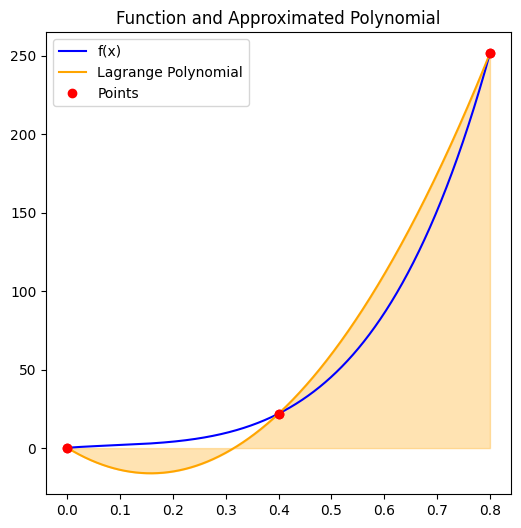

In [37]:
# Write appropriate code
x = np.linspace(0, 0.8, 1000)
y_f = f(x)
#y_l = lagrange(0, 0.4, 0.8, x)
y_l = lagrange(x0, x1, x2, x)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, y_f, label="f(x)", color="blue")
ax.plot(x, y_l, label="Lagrange Polynomial", color="orange")

ax.plot(x0, f(x0), 'o', color='red')
ax.plot(x1, f(x1), 'o', color='red')
ax.plot(x2, f(x2), 'o', color='red')

ax.plot([x0, x1, x2], [f(x0), f(x1), f(x2)], 'ro', label="Points")

ax.fill_between(x, y_l, 0, color="orange", alpha=0.3)
ax.set_title("Function and Approximated Polynomial")
ax.legend()


plt.show()

##### **Step 5: Define a function to approximate the integral using Simpson's 1/3 rule**

Define a function `simpson` that takes a parameter `interval` and returns the approximate value of the integral of $f(x)$ over the interval `interval` using Simpson's 1/3 rule. You have to employ the following steps:

*   Calculate the midpoint of the interval. Store the value in a variable named `midpoint`.
*   Calculate the value of $f(x_0)$, $f(x_1)$, and $f(x_2)$, where $x_0 = a$, $x_1 = \frac{a+b}{2} = midpoint$, and $x_2 = b$. Store the values in variables named `f0`, `f1`, and `f2` respectively.
*   Calculate the approximate value of the integral using Simpson's 1/3 rule. Store the value in a variable named `I`.
*   Return the value of `I`.

In [33]:
# Write appropriate code
def simpson(interval):

  a, b = interval

  midpoint = (a+b)/2
  #print(midpoint)
  x0 = a
  x1 = midpoint
  x2 = b

  f0 = f(x0)
  f1 = f(x1)
  f2 = f(x2)

  I = (b - a) / 6 * (f0 + 4*f1 + f2)
  return I


##### **Step 6: Approximate the integral using Simpson's 1/3 rule**

Call the function `simpson` with the interval `interval` as the parameter. Store the value returned by the function in a variable named `I`. Print the value of `I`. Then you should compute the integral analytically and find the absolute relative error between the two values. Print the absolute relative error.

In [38]:
# Write appropriate code
#interval = [0, 0.8]
I = simpson(interval)
print(I)

45.26293333333334


In [39]:
def F(x):
  P = 5
  Q = 8
  R = 2
  return ((0.2 * x) + (25/2 * x**2) - ( (P**3/3) * (x**3) ) + ( (Q**3/4)  * (x**4) ) - ( (100*R/5) * (x**5) ) + ( (400/6) * (x**6) ))

integral = F(x2) - F(x0)
print("Integral analytically:", integral)

Integral analytically: 43.624533333333346


In [40]:
absolute_relative_error = abs( (integral - I) / integral) * 100
print("Absolute relative error:", absolute_relative_error, "%")

Absolute relative error: 3.755684874565986 %
